In [110]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition as dec
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.model_selection import StratifiedKFold #, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2]:
data_path_train = os.path.join(os.getcwd(),'Data', 'PartA', '20ng_train.csv')
data_path_test = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')
data_path_labels = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_labels.csv')

ng_train = pd.read_csv(data_path_train, delimiter = ',', compression ='bz2')
X_train = ng_train.drop('class', axis = 1)
y_train = ng_train['class']

ng_test = pd.read_csv(data_path_test, delimiter = ',', compression ='bz2')
X_test = ng_test.drop('class', axis = 1)
y_test = ng_test['class']

ng_labels = pd.read_csv(data_path_labels, delimiter = ',', compression ='bz2')

In [4]:
# 1.1 http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_SummarizingData/BS704_SummarizingData_print.html
# dimensionality, data ranges, feature and class distribution
# anything out of ordinary
# typical features like?

#X_test.head(50)
#X_test.describe()#.iloc[1].sort_values()
#X_test.info() # 5648 entries, 1000 features (word TF-IDF), 

#unique, counts = np.unique(y_train, return_counts=True)
#plt.bar(unique, counts)
#plt.title('Class Frequency')
#plt.xlabel('Class')
#plt.ylabel('Frequency')
#plt.show()

#kmeans = KMeans(n_clusters=5, random_state=1000, n_init = 50).fit(X)
#kmeans.predict(X)

In [4]:
#1.2 Compare testing set with training set

#X_test.head(5)
X_test.describe()

# sizes
#X_test.count

# feature distributions

# repercussions?

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.006194,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.041170,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,1.000000,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114


1.3 Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature?

In [26]:
#not_null_accept = X_train['accept'][X_train['accept']>0]
#sns.distplot(non_null_accept)

#not_null_words = X_train.nonzero()
#not_null_words
#sns.distplot(not_null_words)

2.1 The K-Means algorithm is non-deterministic. Explain why this is, and how the final model is selected in the SKLearn implementation of KMeans.

Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the K-Means algorithm is non-deterministic. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in the SKLearn implementation of KMeans (using the init='k-means++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference.

2.2 One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why?

A reasonable number of clusters for this problem is 8, as we have 8 different newsgroups in the dataset. By taking the number of clusters to be equal with the number of reference clusters (8 classes), our intrinsic evaluation

2.3 We will use the Adjusted Mutual Information (AMI) i.e. adjusted_mutual
_info_score between the clusters and the true (known) labels to quantify the perfor-
mance of the clustering. Give an expression for the MI in terms of entropy. In short,
describe what the MI measures about two variables, why this is applicable here and why
it might be dicult to use in practice. Hint: MI is sometimes referred to as Information
Gain: note that you are asked only about the standard way we dened MI and not the
AMI which is adjusted for the size of the domain and for chance agreement.

Mutual Information (MI) is a function that measures the agreement of two independent label assignments for a dataset (true vs predicted labels). The V-measure (harmonic mean of homogenity and completeness), equivalent to the mutual information discussed above, is given by.  This is applicable here because.... These metrics might be difficult to use in practice because they require the knowledge of the ground truth classes, which are almost never available or require manual assignment by human annotators (as in the supervised learning setting).

In [7]:
# 2.4
amis = []
ks = list(range(2,13))
for k in ks:
    kmeans = KMeans(n_clusters=k,random_state=1000, n_init=50).fit(X_train)
    y = kmeans.predict(X_train)
    amis.append(adjusted_mutual_info_score(y_train, y, average_method='max'))

In [8]:
plt.plot(ks, amis)
plt.show()

NameError: name 'ks' is not defined

2.5 A trend which can be observed from the AMI/# of clusters plot is how the performance keeps steadily increasing up to a number of 9 clusters (which is very close to the true number of classes, 8), after which it keeps slowly decreasing. This suggests that peak performance has been reached at around 8-9 clusters, which is not far from the real number of classes.

In [4]:
kmeans4 = KMeans(n_clusters=4,random_state=1000, n_init=50).fit(X_train)
y4 = kmeans4.predict(X_train)

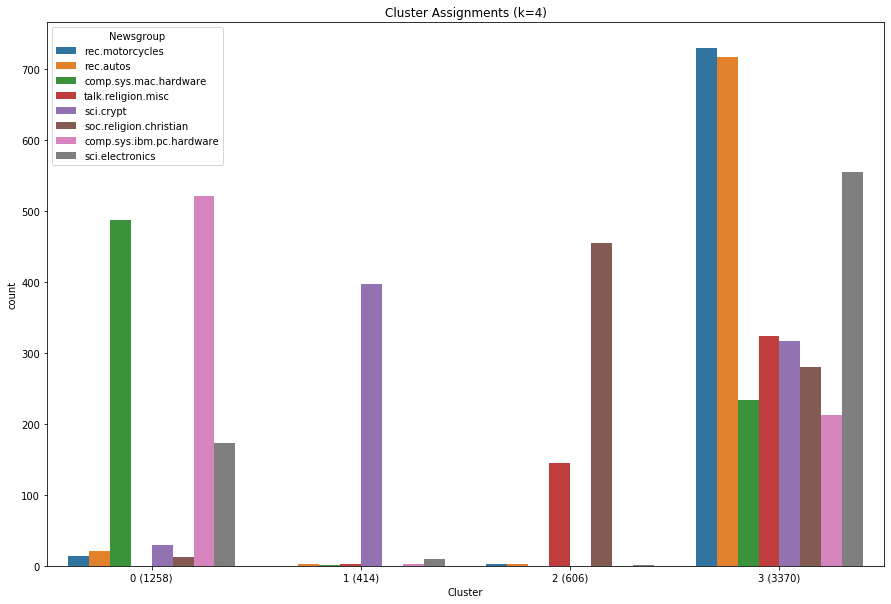

In [5]:
# 2.6
y_train_labels = list(map(lambda x: ng_labels.iloc[x].iloc[0], y_train))
assignments = pd.DataFrame(list(zip(y4, y_train_labels)), columns = ['Cluster', 'Newsgroup'])
plt.figure(figsize=(15,10))
ax = sns.countplot(data=assignments, x='Cluster', hue='Newsgroup')

#count = assignments.groupby(['Cluster']).count() 
#print(count) 
ax.set_xticklabels(['0 (1258)','1 (414)','2 (606)','3 (3370)'])

plt.title('Cluster Assignments (k=4)')
plt.show()

2.7 Clustering in Question 2.6 aligns decently with the true class labels, with the mention that cluster 3 has around 59% of all the data-points, and cluster 1 is left with 7%. Cluster 0 has successfully grouped together two similar classes 'comp.sys.mac.hardware' and 'comp.sys.ibm.pc.hardware', while cluster 2 has also grouped together two similar classes:'talk.religion.misc' and 'soc.religion.christian'. Cluster 1 has isolated the independent class 'sci.crypt', and Cluster 3 has groups together classes 'rec.motorcycles', 'rec.autos', and even 'sci.electronics' which could be considered similar to the other 2.

This is in accordance with the observations in 2.5, where the AMI scores show a general increase of performance from 4 clusters to 8 clusters.

3.1

3.2

3.3

In [57]:
# 3.4
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
f1s = []
for train_index_array, test_index_array in skf.split(X_train, y_train):
    train_instances = X_train.iloc[train_index_array]
    train_classes = y_train.iloc[train_index_array]
    
    test_instances = X_train.iloc[test_index_array]
    test_classes = y_train.iloc[test_index_array]
    
    lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0)
    lr.fit(X=train_instances, y=train_classes)
    predictions = lr.predict(test_instances)
    f1s.append(f1_score(predictions, test_classes, average='macro'))

In [62]:
print("Average F1 score: {}".format(np.mean(f1s)))
print("Standard deviation of F1 score: {}".format(np.std(f1s)))

Average F1 score: 0.6689909262264606
Standard deviation of F1 score: 0.016922045421971926


In [6]:
# 3.5 We will now optimise the Regularisation parameter C using cross-validation.
exponents = np.arange(-4, 5.5, 0.5)
Cs = list(map(lambda x: 10**x, exponents))

f1s_average_training = []
f1s_average_validation = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for reg_param in Cs:
    f1s_training = []
    f1s_validation = []
    
    for train_index_array, test_index_array in skf.split(X_train, y_train):
        train_instances = X_train.iloc[train_index_array]
        train_classes = y_train.iloc[train_index_array]

        test_instances = X_train.iloc[test_index_array]
        test_classes = y_train.iloc[test_index_array]

        lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C=reg_param)
        lr.fit(X=train_instances, y=train_classes)
        
        predictions_training = lr.predict(train_instances)
        predictions_validation = lr.predict(test_instances)
        
        f1s_training.append(f1_score(predictions_training, train_classes, average='macro'))
        f1s_validation.append(f1_score(predictions_validation, test_classes, average='macro'))
    
    f1s_average_training.append(np.mean(f1s_training))
    f1s_average_validation.append(np.mean(f1s_validation))

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, wa

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, wa

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages

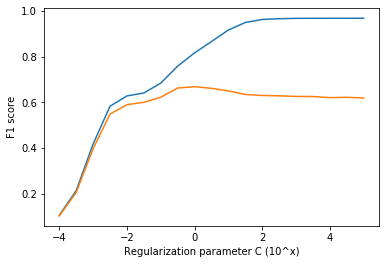

In [29]:
plt.plot(exponents, f1s_average_training, label='Training average')
plt.plot(exponents, f1s_average_validation, label='Validation average')
plt.xlabel('Regularization parameter C (10^x)')
plt.ylabel('F1 score')
plt.show()

In [59]:
# Question B
data_path_bristol_day_aligned = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_DayAligned.csv')
data_path_bristol_site_aligned = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_SiteAligned.csv')
data_path_bristol_exploratory = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_Exploratory.csv')

bristol_day_aligned = pd.read_csv(data_path_bristol_day_aligned, delimiter = ',', header=[0], parse_dates=[1], index_col=[0, 1], compression ='bz2')
bristol_site_aligned = pd.read_csv(data_path_bristol_site_aligned, delimiter = ',', header=[0, 1], parse_dates=[0], compression ='bz2')
bristol_exploratory = pd.read_csv(data_path_bristol_exploratory, delimiter = ',', header=[0], compression ='bz2')

4.1 Summarise the key features/observations in the data:

describe the purpose of each column and report (briefy)

the dimensionality/ranges (ballpark figures only, and how they compare across features) and number of sites, and 
identify anything out of the ordinary/problematic: i.e. look out for missing data and negative values. 

Why are the latter unreasonable in such a dataset?
Pollution can't be negative?

Hint: Refer to the documentation for how to interpret the pollutant values.

In [55]:
# 4.1
#bristol_exploratory.describe()
#bristol_exploratory.info()
bristol_exploratory.head(5)
#unique, counts = np.unique(bristol_exploratory['SiteID'], return_counts=True)
#print(counts)

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.00,28.00,28.75,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.50,32.00,32.50,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.00,97.75,68.00,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.80,39.52,44.52,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.78,31.94,54.67,8,51.489993,-2.688779


In [73]:
# 4.2
SiteIDS = range(0, 18)
table = pd.DataFrame(columns = ['SiteID', 'Number of samples', 'Missing data', 'Negative entries'])
for SiteID in SiteIDS:
    site = bristol_exploratory.loc[bristol_exploratory['SiteID'] == SiteID]
    
    site_count = site.shape[0]
    missing = site_count - site.dropna().shape[0]
    negative = site_count - ((site['NOx']>=0) & (site['NO2']>=0) & (site['NO']>=0)).sum()
    table = table.append({'SiteID' :  SiteID, 'Number of samples' :  site_count, 'Missing data' :  missing/site_count, 'Negative entries' :  negative/site_count}, ignore_index=True)
    
table
#table.to_latex(index=False)

,SiteID,Number of samples,Missing data,Negative entries
0,0.0,6446.0,0.016134,0.016134
1,1.0,163111.0,0.062902,0.062902
2,2.0,62990.0,0.043483,0.043531
3,3.0,25464.0,0.773327,0.781103
4,4.0,74787.0,0.020685,0.020726
5,5.0,113952.0,0.088283,0.088283
6,6.0,142141.0,0.074440,0.074468
7,7.0,115162.0,0.041950,0.044728
8,8.0,43824.0,0.210570,0.210570
9,9.0,22071.0,0.053011,0.053011


4.3 Briefly summarise how the sites compare in terms of number of samples and amount of problematic samples.

Sites are unevenly distributed in terms of number of samples: the mean is of 72597 samples, but minimum (site 15) has 2712 samples and maximum (site 1) has 163111 samples. In terms of problematic samples, each site has an average of 19% missing data and 19% negative entries, with two exceptions being site 3 (77% missing data, 78% negative entries) and site 15 (100% - every entry has missing data and negative values).

In [83]:
# 4.4
bristol_exploratory_clean = bristol_exploratory.query('SiteID != 3 & SiteID != 15')
bristol_exploratory_clean.corr()

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
NOx,1.000000,0.878016,0.988019,0.226668,-0.020511,-0.075187
NO2,0.878016,1.000000,0.807853,0.297316,-0.013581,-0.086150
NO,0.988019,0.807853,1.000000,0.193246,-0.019080,-0.078435
SiteID,0.226668,0.297316,0.193246,1.000000,0.193402,-0.216233
Loc.Lat,-0.020511,-0.013581,-0.019080,0.193402,1.000000,-0.199014
Loc.Long,-0.075187,-0.086150,-0.078435,-0.216233,-0.199014,1.000000


4.5 Each pair of pollutants has a very high correlation.

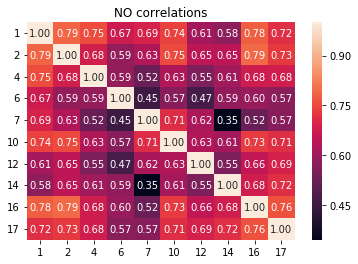

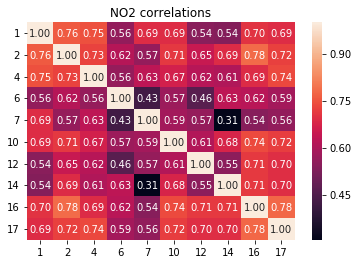

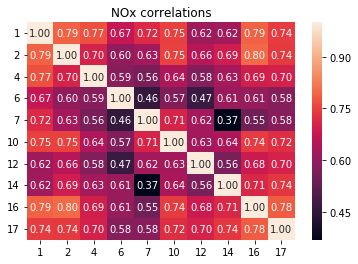

NOx                                                              \
               1         2         4         6         7        10        12   
NOx 1   1.000000  0.790952  0.768484  0.672527  0.715104  0.749820  0.618107   
    2   0.790952  1.000000  0.703864  0.599381  0.626590  0.751528  0.656468   
    4   0.768484  0.703864  1.000000  0.585420  0.561669  0.641436  0.578020   
    6   0.672527  0.599381  0.585420  1.000000  0.457004  0.573486  0.467043   
    7   0.715104  0.626590  0.561669  0.457004  1.000000  0.706425  0.624555   
    10  0.749820  0.751528  0.641436  0.573486  0.706425  1.000000  0.627573   
    12  0.618107  0.656468  0.578020  0.467043  0.624555  0.627573  1.000000   
    14  0.621579  0.690948  0.629497  0.611445  0.368678  0.638349  0.564069   
    16  0.790794  0.802339  0.694518  0.607887  0.552963  0.741246  0.682349   
    17  0.741468  0.738754  0.701558  0.582451  0.583912  0.722625  0.703402   

                                      
              14        16        17  
NOx 1   0.621579  0.790794  0.741468  
    2   0.690948  0.802339  0.738754  
    4   0.629497  0.694518  0.701558  
    6   0.611445  0.607887  0.582451  
    7   0.368678  0.552963  0.583912  
    10  0.638349  0.741246  0.722625  
    12  0.564069  0.682349  0.703402  
    14  1.000000  0.713508  0.735480  
    16  0.713508  1.000000  0.783519  
    17  0.735480  0.783519  1.000000

In [53]:
# 4.6
import mpctools.extensions.mplext as mpc
NOx_corr = bristol_site_aligned.iloc[:, list(range(1,11))].copy().corr()
NO2_corr = bristol_site_aligned.iloc[:, list(range(11,21))].copy().corr()
NO_corr = bristol_site_aligned.iloc[:, list(range(21,31))].copy().corr()

plt.title('NO correlations')
mpc.plot_matrix(NO_corr.values, mode='heatmap', show_val=True, labels=['1','2','4','6','7','10','12','14','16','17'])
plt.show()

plt.title('NO2 correlations')
mpc.plot_matrix(NO2_corr.values, mode='heatmap', show_val=True, labels=['1','2','4','6','7','10','12','14','16','17'])
plt.show()

plt.title('NOx correlations')
mpc.plot_matrix(NOx_corr.values, mode='heatmap', show_val=True, labels=['1','2','4','6','7','10','12','14','16','17'])
plt.show()

4.7 Comment briefly on your observations from Question 4:(f): start by summarising the results from the NO gas and then comment on whether the same is observed in the other gases or if there is something different.

???????????????
The NO gas readings show a low correlation (0.35) between sites 14 and 7. The exact sme is observed in the other gases.

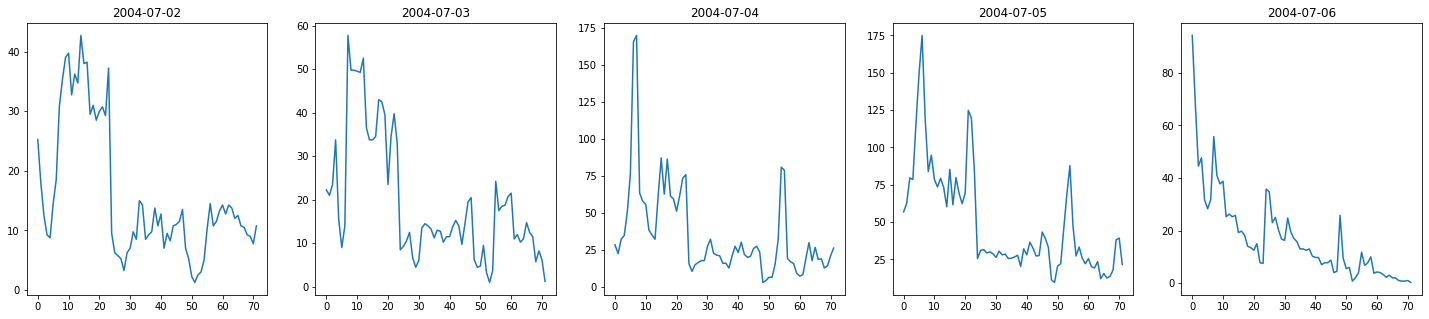

In [129]:
# 5.1
import matplotlib.gridspec as gridspec
x = range(0,72);
gs = gridspec.GridSpec(1, 5)

plt.figure(figsize=(25,5))
ax = plt.subplot(gs[0, 0])
plt.plot(x, bristol_day_aligned.iloc[0])
plt.title('2004-07-02')

ax = plt.subplot(gs[0, 1])
plt.plot(x, bristol_day_aligned.iloc[1])
plt.title('2004-07-03')

ax = plt.subplot(gs[0, 2])
plt.plot(x, bristol_day_aligned.iloc[2])
plt.title('2004-07-04')

ax = plt.subplot(gs[0, 3])
plt.plot(x, bristol_day_aligned.iloc[3])
plt.title('2004-07-05')

ax = plt.subplot(gs[0, 4])
plt.plot(x, bristol_day_aligned.iloc[4])
plt.title('2004-07-06')

plt.show()

In [132]:
site1_day_aligned = bristol_day_aligned.query('SiteID == 1');
pca = dec.PCA(n_components=72, random_state=0)
pca.fit(site1_day_aligned)

PCA(copy=True, iterated_power='auto', n_components=72, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

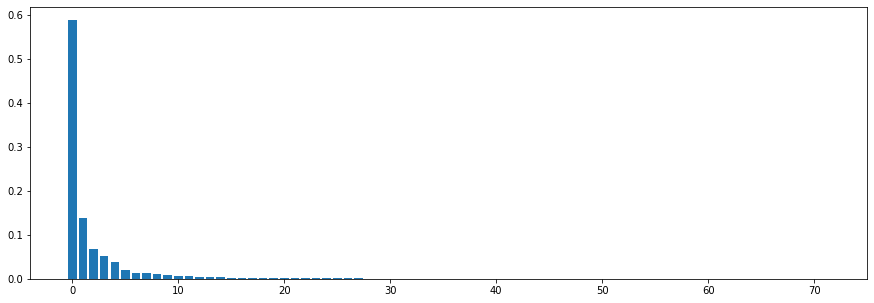

In [145]:
plt.figure(figsize=(15,5))
plt.bar(range(0,72), pca.explained_variance_ratio_)
plt.show()

In [146]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

NameError: name 'covar_matrix' is not defined

In [ ]:
# 6.1
